In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Let's create a dataset suitable for clustering

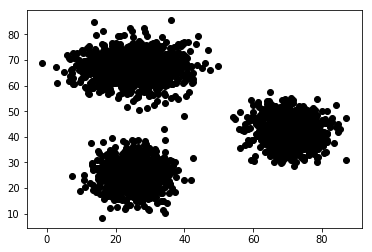

In [26]:
# class 1
x1 = np.random.normal(25,5,1000)
y1 = np.random.normal(25,5,1000)

# class 2
x2 = np.random.normal(70,5,1000)
y2 = np.random.normal(42,5,1000)

# class 3
x3 = np.random.normal(25,8,1000)
y3 = np.random.normal(67,5,1000)

x = np.concatenate((x1,x2,x3),axis=0)
y = np.concatenate((y1,y2,y3),axis=0)

dic = {'x':x,'y':y}
data = pd.DataFrame(dic)
#data = pd.DataFrame.from_dict(dic)

#plt.scatter(x1,y1,color='red')
#plt.scatter(x2,y2,color='blue')
#plt.scatter(x3,y3,color='lime')
#plt.show()

plt.scatter(x,y,color='black')
plt.show()

# K Means Clustering
### Finding Optimal number of clusters

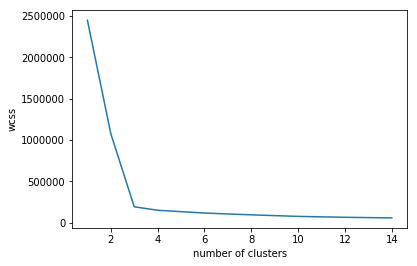

In [13]:
from sklearn.cluster import KMeans
wcss =[] # within clusters sum of squares

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,15),wcss)
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

### We can see that optimal number of clusters is 3

In [23]:
kmeans2 = KMeans(n_clusters = 3)
#kmeans2.fit(data)
#clusters = kmeans2.predict(data)
clusters = kmeans2.fit_predict(data)

data['label'] = clusters
data.label.value_counts()


0    1002
1    1000
2     998
Name: label, dtype: int64

### Visualization of clusters predicted and cluster centroids

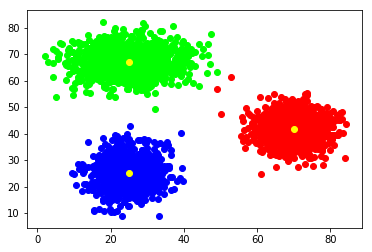

In [24]:
plt.scatter(data.x[data.label == 0],data.y[data.label == 0], color = 'red')
plt.scatter(data.x[data.label == 1],data.y[data.label == 1], color = 'blue')
plt.scatter(data.x[data.label == 2],data.y[data.label == 2], color = 'lime')
plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], color = 'yellow')
plt.show()

# Hierarchical Clustering
### Dendrogram

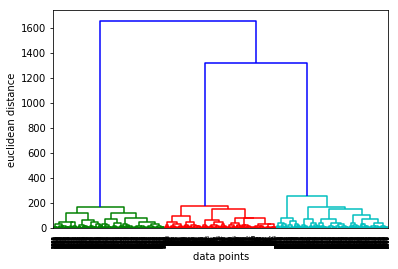

In [28]:
from scipy.cluster.hierarchy import linkage, dendrogram
merg = linkage(data, method = 'ward')
dendrogram(merg, leaf_rotation = 90)
plt.xlabel('data points')
plt.ylabel('euclidean distance')
plt.show()

### Dendrogram above tells us that, optimal cluster number is 3.

In [35]:
from sklearn.cluster import AgglomerativeClustering

h_clustering_model = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
gluster = h_clustering_model.fit_predict(data)

data['label'] = gluster
data.label.value_counts()

1    1000
2    1000
0    1000
Name: label, dtype: int64

### Visualization of clusters predicted

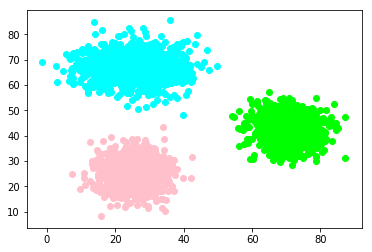

In [36]:
plt.scatter(data.x[data.label == 0], data.y[data.label == 0], color = 'cyan')
plt.scatter(data.x[data.label == 1], data.y[data.label == 1], color = 'lime')
plt.scatter(data.x[data.label == 2], data.y[data.label == 2], color = 'pink')
plt.show()